In [17]:
import numpy             as np
import matplotlib.pyplot as plt

from itertools                          import cycle
from sklearn.cluster                    import AffinityPropagation
from sklearn.datasets.samples_generator import make_blobs, make_moons

%matplotlib inline


# Affinity propagation

Brendan J. Frey and Delbert Dueck, "Clustering by Passing Messages
Between Data Points", Science Feb. 2007




In [42]:
X, labels_true = make_moons(n_samples=50, noise=.05)
af                      = AffinityPropagation(preference=-5).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels                  = af.labels_

n_clusters_ = len(cluster_centers_indices)

In [43]:
centers        = [[1, 1], [-1, -1], [1, -1]]
X, labels_true = make_blobs(n_samples=300, centers=centers, cluster_std=0.5,
                            random_state=0)

af                      = AffinityPropagation(preference=-20).fit(X)
cluster_centers_indices = af.cluster_centers_indices_
labels                  = af.labels_

n_clusters_ = len(cluster_centers_indices)

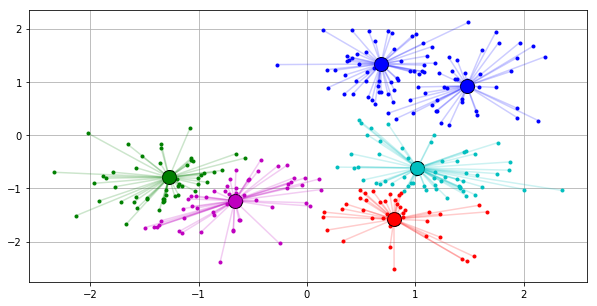

In [44]:
colors = cycle('bgrcm')
plt.figure(figsize=(10,5))
for k, col in zip(range(n_clusters_), colors):
    class_members  = labels == k
    cluster_center = X[ cluster_centers_indices[k] ]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col, alpha=0.2)

plt.grid(True)
plt.show()